In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import scipy.stats as stats
import numpy as np
import pickle

In [8]:
fGCB = './../../Prelim_Data_Analysis/gcb_data/budget.csv'
df = pd.read_csv(fGCB,
                 index_col=0,
                 usecols=[0,4,5,6])
df.head()

,ocean sink,land sink,budget imbalance
Year,,,
1959,0.852376,0.516073,0.860316
1960,0.819017,1.394030,0.522722
1961,0.714842,0.605098,1.213762
1962,0.756709,1.348349,0.959605
1963,0.904997,0.877794,1.355333


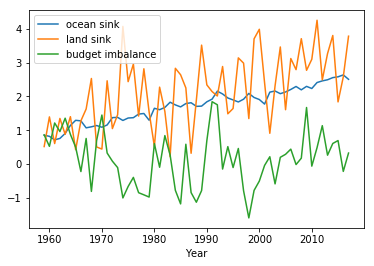

In [9]:
df.plot()

In [22]:
ocean = -df["ocean sink"]
land_model = -df["land sink"]
land = -df["land sink"]-df["budget imbalance"]

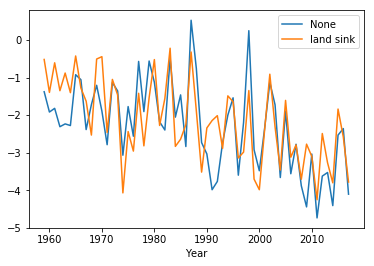

In [23]:
land.plot()
land_model.plot()
plt.legend()

In [24]:
def lin_reg(time_list, data, **kwargs):
    
    regression = {}
    for period in time_list.keys():
        x=time_list[period]
        y=data[x].values

        reg = stats.linregress(x,y)
        slope=reg[0]
        intercept=reg[1]
        
        line = slope*x+intercept
        
        regression[period] = (reg[0], reg[2])

        plt.plot(x, line, **kwargs)
    
    return regression

In [7]:
x1=ocean.index[1:12]
x2=ocean.index[11:22]
x3=ocean.index[21:32]
x4=ocean.index[31:42]
x5=ocean.index[41:52]
x6=ocean.index[48:59]
x7=ocean.index

In [8]:
time_dict={'1960-1970':x1, '1970-1980':x2, '1980-1990':x3, '1990-2000':x4,
           '2000-2010':x5, '2007-2017':x6}

Text(0, 0.5, 'C flux to the atmosphere (GtC/yr)')

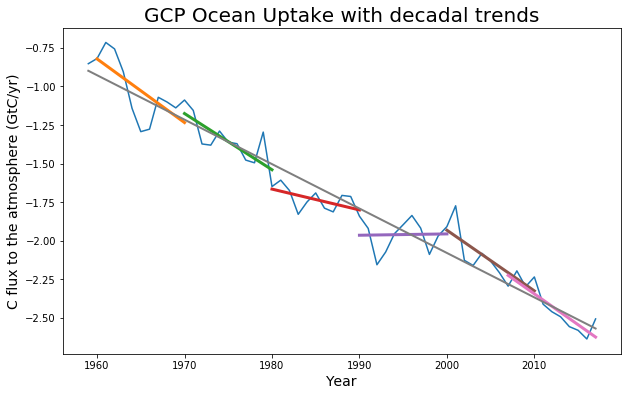

In [9]:
plt.figure(figsize=(10,6))
plt.plot(ocean)
ocean_decade = lin_reg(time_dict, ocean, linewidth=3)
ocean_whole = lin_reg({'1959-2017':x7}, ocean, linewidth=2)
plt.title('GCP Ocean Uptake with decadal trends', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('C flux to the atmosphere (GtC/yr)', fontsize=14)

In [10]:
ocean_decade, ocean_whole

({'1960-1970': (-0.041244831000909095, -0.685428971071531),
  '1970-1980': (-0.03643333040818182, -0.7784236156422163),
  '1980-1990': (-0.013505445087272722, -0.5794465163895354),
  '1990-2000': (0.000860501354545447, 0.02755904378210424),
  '2000-2010': (-0.039324524412727276, -0.8157133566033844),
  '2007-2017': (-0.04001142982727274, -0.8920865048318766)},
 {'1959-2017': (-0.02879814903541788, -0.9708966153199413)})

In [11]:
pickle.dump(ocean_decade, open('./../Output/output_linreg/GCP/regression_ocean.pik', 'wb'))

Text(0, 0.5, 'C flux to the atmosphere (GtC/yr)')

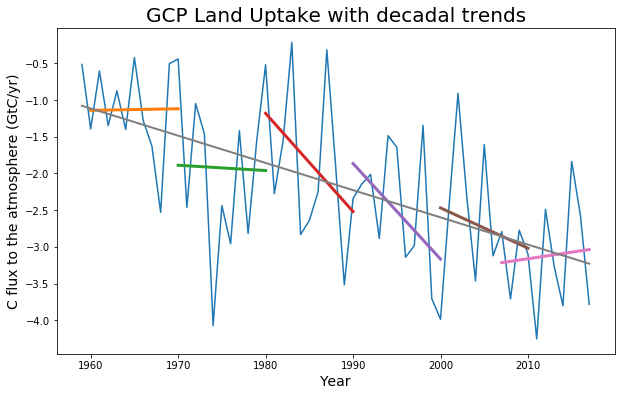

In [12]:
plt.figure(figsize=(10,6))
plt.plot(land)
land_decade = lin_reg(time_dict, land, linewidth=3)
land_whole = lin_reg({'1959-2017':x7}, land, linewidth=2)
plt.title('GCP Land Uptake with decadal trends', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('C flux to the atmosphere (GtC/yr)', fontsize=14)

In [13]:
land_decade, land_whole

({'1960-1970': (0.002169502605454543, 0.011201414958916762),
  '1970-1980': (-0.0072140079027272815, -0.021321152945218226),
  '1980-1990': (-0.13373915597545455, -0.40781539684623286),
  '1990-2000': (-0.13017918867090908, -0.4845515832532011),
  '2000-2010': (-0.05490243689000003, -0.2007967332814111),
  '2007-2017': (0.01782893230636364, 0.08260069724825218)},
 {'1959-2017': (-0.03708142333225599, -0.5873401221753709)})

In [14]:
pickle.dump(land_decade, open('./../Output/output_linreg/GCP/regression_land.pik', 'wb'))

Text(0, 0.5, 'C flux to the atmosphere (GtC/yr)')

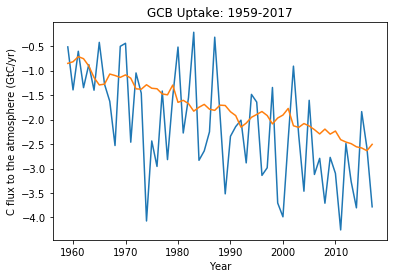

In [15]:
plt.plot(land.index, land)
plt.plot(ocean.index, ocean)
plt.title('GCB Uptake: 1959-2017')
plt.xlabel('Year')
plt.ylabel('C flux to the atmosphere (GtC/yr)')

In [16]:
co2=pd.read_csv('./../co2_temp_data/weighted_co2.csv', usecols=[1,2], index_col='Date')

In [17]:
co2.index[10:-1]

Float64Index([1959.0411,  1959.126, 1959.2027, 1959.2877, 1959.3699, 1959.4548,
               1959.537, 1959.6219, 1959.7068,  1959.789,
              ...
              2017.2027, 2017.2877, 2017.3699, 2017.4548,  2017.537, 2017.6219,
              2017.7068,  2017.789,  2017.874, 2017.9562],
             dtype='float64', name='Date', length=708)

In [18]:
co2_annual = co2.iloc[10:-1]
co2_annual.index=np.floor(co2_annual.index)
co2_annual = co2_annual.groupby('Date').mean()

In [19]:
temp=pd.read_csv('./../co2_temp_data/temp_annual.csv', index_col='Year')
temp.head()

,Temp
Year,
1959,14.03
1960,13.98
1961,14.06
1962,14.04
1963,14.05


LinregressResult(slope=-0.0001398788146646571, intercept=0.26723631500027223, rvalue=-0.6950814509077761, pvalue=1.0084994845416696e-09, stderr=1.91631114159606e-05)

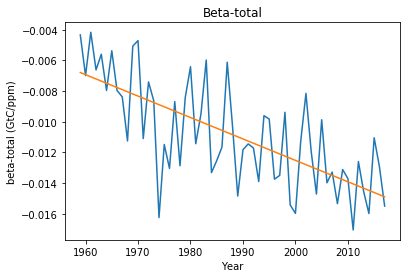

In [20]:
x=ocean.index
y=(land+ocean)/co2_annual.CO2

reg = stats.linregress(x,y)
slope=reg[0]
intercept=reg[1]

line = slope*x+intercept

plt.plot(ocean.index, (land+ocean)/co2_annual.CO2)
plt.plot(x, line)
plt.title('Beta-total')
plt.xlabel('Year')
plt.ylabel('beta-total (GtC/ppm)')
reg

LinregressResult(slope=-7.911789106351226e-05, intercept=0.1512808562365081, rvalue=-0.4745061826638258, pvalue=0.00014654656809181635, stderr=1.9440279440573718e-05)

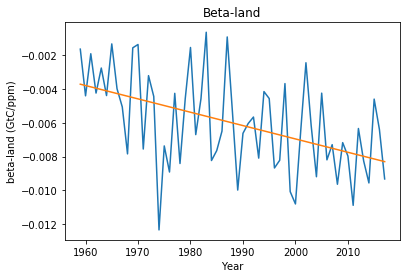

In [21]:
x=land.index
y=land/co2_annual.CO2

reg = stats.linregress(x,y)
slope=reg[0]
intercept=reg[1]

line = slope*x+intercept

plt.plot(land.index, land/co2_annual.CO2)
plt.plot(x, line)
plt.title('Beta-land')
plt.xlabel('Year')
plt.ylabel('beta-land (GtC/ppm)')
reg

LinregressResult(slope=-6.0760923601144825e-05, intercept=0.11595545876376408, rvalue=-0.9348127696297086, pvalue=2.6494705614010975e-27, stderr=3.0574758818955265e-06)

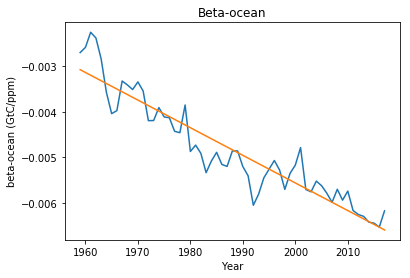

In [22]:
x=ocean.index
y=ocean/co2_annual.CO2

reg = stats.linregress(x,y)
slope=reg[0]
intercept=reg[1]

line = slope*x+intercept

plt.plot(ocean.index, ocean/co2_annual.CO2)
plt.plot(x, line)
plt.title('Beta-ocean')
plt.xlabel('Year')
plt.ylabel('beta-ocean (GtC/ppm)')
reg

Text(0, 0.5, 'Gamma-total (GtC/K)')

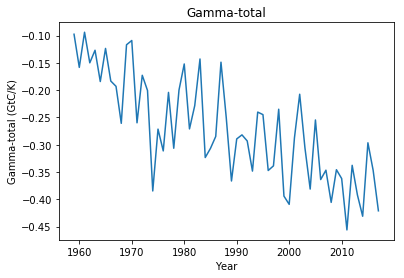

In [23]:
plt.plot(land.index, (land+ocean)/temp.Temp)
plt.title('Gamma-total')
plt.xlabel('Year')
plt.ylabel('Gamma-total (GtC/K)')

Text(0, 0.5, 'Gamma-land (GtC/K)')

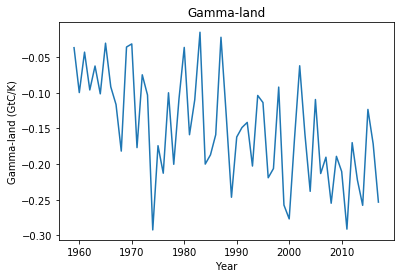

In [24]:
plt.plot(land.index, land/temp.Temp)
plt.title('Gamma-land')
plt.xlabel('Year')
plt.ylabel('Gamma-land (GtC/K)')

Text(0, 0.5, 'Gamma-ocean (GtC/K)')

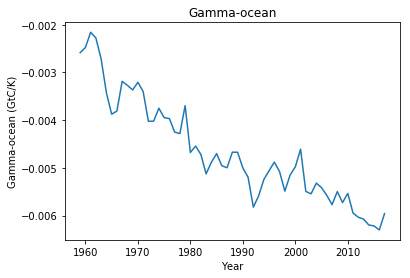

In [25]:
plt.plot(ocean.index, ocean/(co2_annual.CO2+temp.Temp))
plt.title('Gamma-ocean')
plt.xlabel('Year')
plt.ylabel('Gamma-ocean (GtC/K)')

## rolling gradient analysis

In [25]:
test_land = land.iloc[0:11]
stats.linregress(test_land.index, test_land)[0]

0.034259466551818184

In [26]:
def rolling_trend(data, window=10, r_plot=False):
    
    roll_values = []
    r_values = []
    
    for i in range(0,59-window):
        df = data.iloc[i:i+window+1]
        roll_values.append(stats.linregress(df.index, df)[0])
        r_values.append(stats.linregress(df.index, df)[2])
        
    data.plot()
    plt.ylabel('C flux to the atmosphere (GtC/yr)')
    
    roll_df = pd.DataFrame({f'{window}-year trend slope': roll_values}, index=data.index[:-window])
    roll_df.plot(color='g')
    plt.ylabel('Slope of C flux trend (GtC/yr/yr)')
    
    if r_plot:
        r_df = pd.DataFrame({'r-values of trends': r_values}, index=data.index[:-window])
        r_df.plot(color='k')
        plt.ylabel('r-value of slope')
        return roll_df, r_df
    
    return roll_df

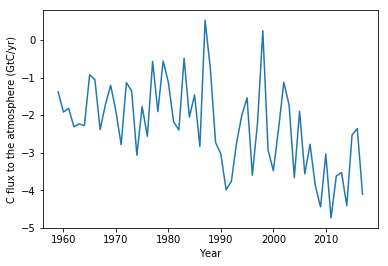

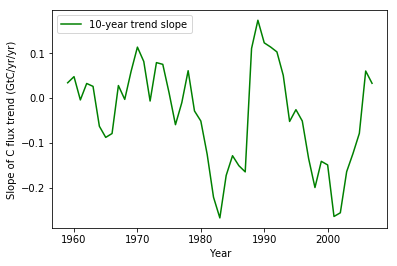

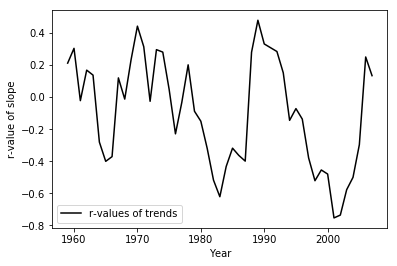

In [27]:
land_roll, land_r = rolling_trend(land, window=10, r_plot=True)

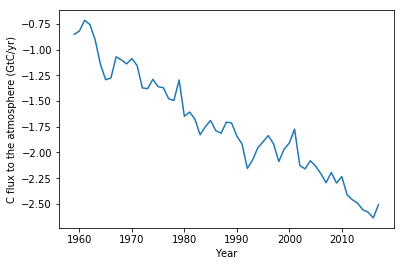

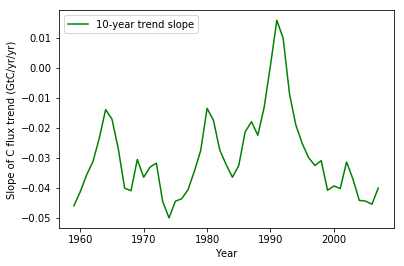

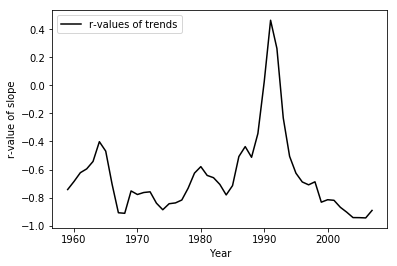

In [28]:
ocean_roll, ocean_r = rolling_trend(ocean, window=10, r_plot=True)

In [29]:
land_roll.to_csv('./../Output/output_linreg/GCP/land_rolling_trend.csv')
ocean_roll.to_csv('./../Output/output_linreg/GCP/ocean_rolling_trend.csv')

In [30]:
stats.linregress(ocean_roll.index, ocean_roll.values.squeeze())

LinregressResult(slope=6.877812775259757e-05, intercept=-0.1659711311277609, rvalue=0.06916598457136404, pvalue=0.6367630972422306, stderr=0.0001446996718855877)

In [31]:
stats.linregress(land_roll.index, land_roll.values.squeeze())

LinregressResult(slope=-0.0026691417905935063, intercept=5.255468004991042, rvalue=-0.3384745381402831, pvalue=0.017367121473629784, stderr=0.0010823682671217095)

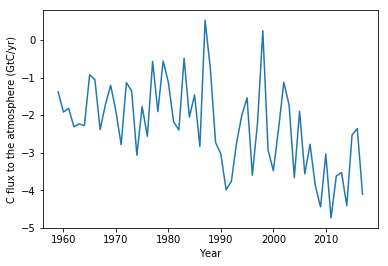

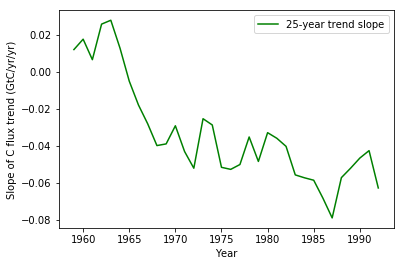

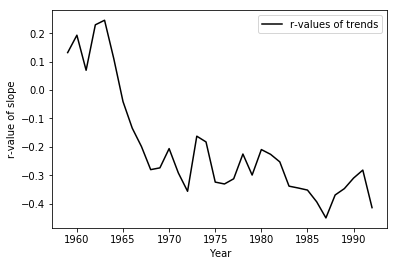

In [32]:
land_roll_25, land_r_25 = rolling_trend(land, window=25, r_plot=True)

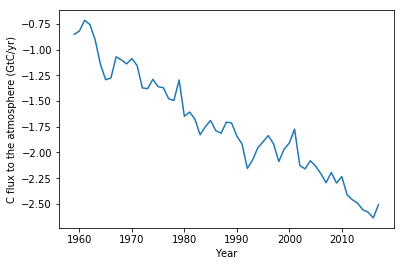

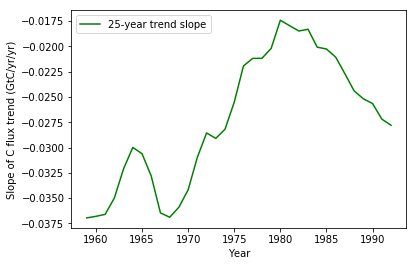

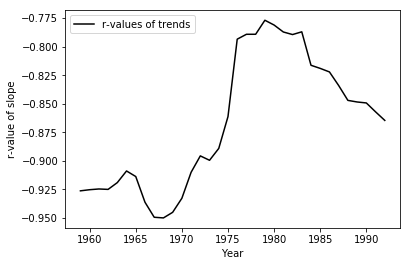

In [33]:
ocean_roll_25, ocean_r_25 = rolling_trend(ocean, window=25, r_plot=True)

In [34]:
stats.linregress(ocean_roll_25.index, ocean_roll_25.values.squeeze())

LinregressResult(slope=0.0004869043743091056, intercept=-0.9891679676989714, rvalue=0.7459995842288656, pvalue=4.1078893567889605e-07, stderr=7.683682012453981e-05)

In [35]:
stats.linregress(land_roll_25.index, land_roll_25.values.squeeze())

LinregressResult(slope=-0.0023132291761994764, intercept=4.53660527779367, rvalue=-0.8262997604307509, pvalue=1.7580806439140637e-09, stderr=0.00027873550047390684)

# Uptake reg vs. temp ave

In [36]:
temp = pd.read_csv('./../co2_temp_data/temp_annual.csv', index_col='Year')
temp.head()

,Temp
Year,
1959,14.03
1960,13.98
1961,14.06
1962,14.04
1963,14.05


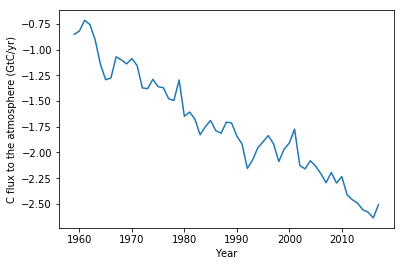

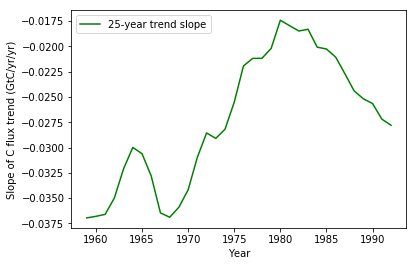

In [37]:
rolling_trend(ocean, window=25);

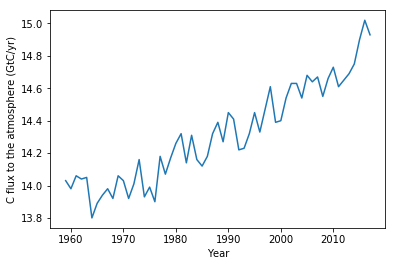

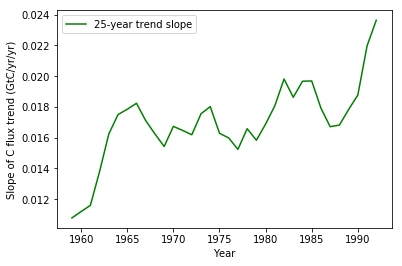

In [38]:
rolling_trend(temp.Temp, window=25);